<a href="https://colab.research.google.com/github/MiinJuung/class-python-for-DM/blob/main/HW1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1

**데이터 불러오기 ( 1번째 예제 데이터 사용)**


In [13]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

**데이터 인코딩**

In [14]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [15]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

**모델 구성**

***L1 regularization 적용한 모델***

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l1(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l1(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l1_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 1.5659 - accuracy: 0.6913 - val_loss: 0.9200 - val_accuracy: 0.6625
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.8565 - accuracy: 0.8053 - val_loss: 0.8310 - val_accuracy: 0.8354
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.8031 - accuracy: 0.8255 - val_loss: 0.7999 - val_accuracy: 0.8168
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.7632 - accuracy: 0.8363 - val_loss: 0.7770 - val_accuracy: 0.8276
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.7406 - accuracy: 0.8410 - val_loss: 0.7427 - val_accuracy: 0.8422
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.7200 - accuracy: 0.8452 - val_loss: 0.7299 - val_accuracy: 0.8405
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.7042 - accuracy: 0.8476 - val_loss: 0.7138 - val_accuracy: 0.8496
Epoch 8/20
30

**L1 regularization한 model의 validation loss History graph**

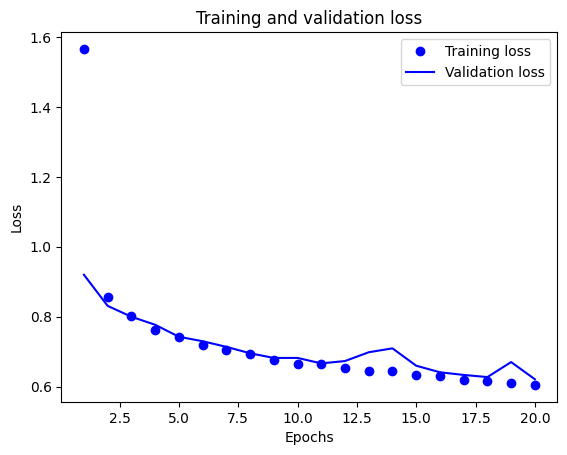

In [17]:
import matplotlib.pyplot as plt
history_dict = history_l1_reg.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

***dropout regularization 적용한 모델***

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.6322 - accuracy: 0.6327 - val_loss: 0.5034 - val_accuracy: 0.8416
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5106 - accuracy: 0.7553 - val_loss: 0.3941 - val_accuracy: 0.8739
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4272 - accuracy: 0.8151 - val_loss: 0.3276 - val_accuracy: 0.8825
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3669 - accuracy: 0.8538 - val_loss: 0.3015 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3245 - accuracy: 0.8752 - val_loss: 0.2861 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2876 - accuracy: 0.8981 - val_loss: 0.2812 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2569 - accuracy: 0.9101 - val_loss: 0.2929 - val_accuracy: 0.8852
Epoch 8/20
30

**Dropout regularization한 model의 validation loss History graph**

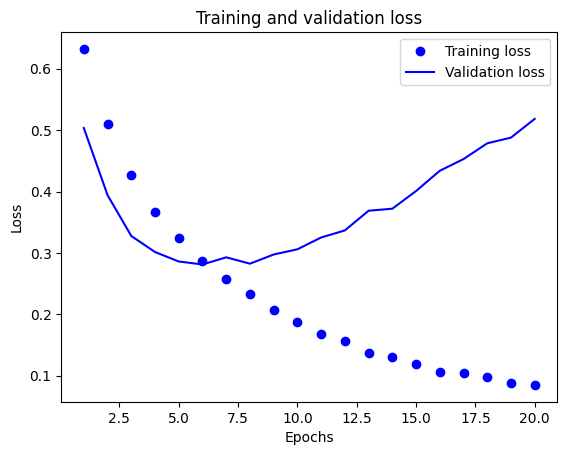

In [19]:
import matplotlib.pyplot as plt
history_dict = history_dropout.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**L1 방법과 Dropout 방법의 validation accuracy를 비교한 그래프**

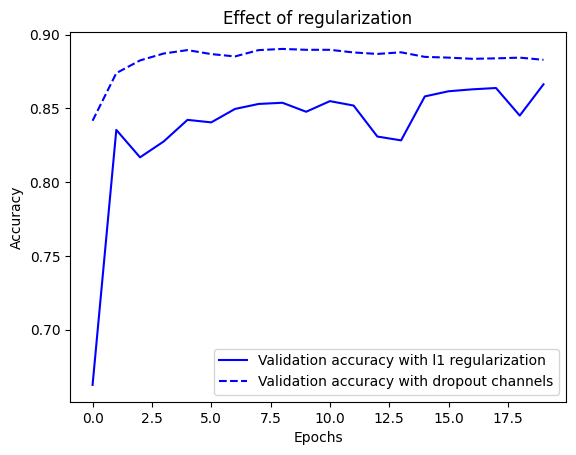

In [20]:
import matplotlib.pyplot as plt
val_acc_l1 = history_l1_reg.history["val_accuracy"]
val_acc_dropout = history_dropout.history["val_accuracy"]
epochs = range(0, 20)
plt.plot(epochs, val_acc_l1, "b-",
         label="Validation accuracy with l1 regularization")
plt.plot(epochs, val_acc_dropout, "b--",
         label="Validation accuracy with dropout channels")
plt.title("Effect of regularization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Dropout 방법의 정확도가 더 높은 것으로 보아 더 좋은 regularization방법임을 알 수 있다.